<a href="https://colab.research.google.com/github/CardosoJr/ml/blob/master/Stats/Bias_Correction_in_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias Correction Methods in estimating bootstrapping confidence intervals

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
stats.qnorm()

In [1]:
y=[7,7,6,9,8,7,8,7,7,7,6,6,6,8,7,7,7,7,6,7,
8,7,7,6,8,7,8,7,8,7,7,7,5,7,7,7,6,7,8,7,7,
8,6,9,7,14,12,10,13,15]

In [4]:
obs = stats.trim_mean(y, 0.1)
obs

7.225

## Normal Approximation

In [28]:
alpha = 0.05
R = 100

boot = [stats.trim_mean(np.random.choice(y, size = len(y), replace = True), 0.1) for i in range(R)]

ci = stats.norm.ppf([alpha/2, 1 - alpha/2], loc = obs, scale = np.std(boot, ddof=1))
print(ci)

[6.87225186 7.57774814]


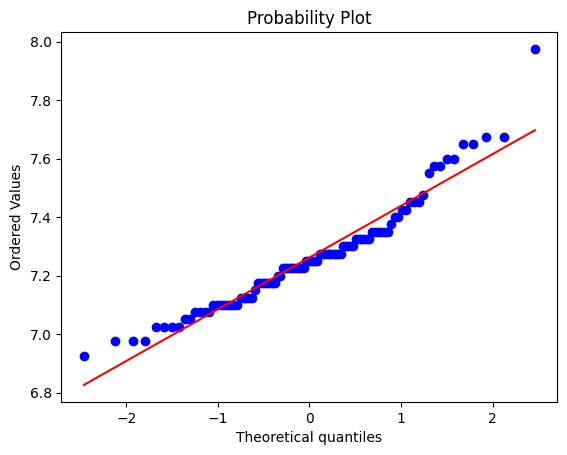

In [29]:
stats.probplot(boot, plot = plt);

## Percentile Method

In [31]:
R = 5000
boot = [stats.trim_mean(np.random.choice(y, size = len(y), replace = True), 0.1) for i in range(R)]
np.quantile(boot, [alpha/2, 1 - alpha/2])

array([6.95 , 7.775])

## Backwards percentile limits

In [32]:
R = 5000
boot = [stats.trim_mean(np.random.choice(y, size = len(y), replace = True), 0.1) for i in range(R)]
ci = np.quantile(boot, [alpha/2, 1 - alpha/2])

2*obs-ci[1], 2*obs-ci[0]

(6.674999999999999, 7.499999999999999)

## Bias corrected percentile limits

In [ ]:
b=qnorm((sum(boot > obs)+sum(boot==obs)/2)/r)
z=qnorm(c(alpha/2,1-alpha/2)) # Std. norm. limits
p=pnorm(z-2*b) # bias-correct & convert to proportions
quantile(boot,p=p) # Bias-corrected percentile lims.

# 6.925 to 7.700

## Accelerated bias corrected percentile limits

In [ ]:
# use a 10% trimmed mean
stat=function(y){mean(y,trim=0.1)}
(obs=stat(y)) # Observed value of stat.

R=5000 # use 5000 bootstraps
boot=r=0 ; while(r < R){r=r+1 # for each of R samples
 boot[r]=stat(sample(y,replace=TRUE))} # get bootstrap stat.

# estimate bias in std. norm deviates
b=qnorm((sum(boot > obs)+sum(boot==obs)/2)/r)

# estimate acceleration constant
n=length(y) ; n1=n-1 ; obsn=obs*n
pv=i=0 ; while(i < n){i=i+1 ; pv[i]=obsn-n1*stat(y[-i])}
je=mean(pv)-pv
a=sum(je^3)/(6*sum(je^2))^(3/2)

alpha=0.05 # 95% limits
z=qnorm(c(alpha/2,1-alpha/2)) # Std. norm. limits
p=pnorm((z-b)/(1-a*(z-b))-b) # correct & convert to proportions

quantile(boot,p=p) # ABC percentile lims.

# 6.9 to 7.7

## Studentized percentile limits

In [ ]:
# use a 10% trimmed mean
stat=function(y){mean(y,trim=0.1)}
(obs=stat(y)) # Observed value of stat

R=5000 # use 5000 1st-stage bootstrap statistics
R2=100 # use 100 2nd-stage bootstrap statistics

boot=boott=r=0 ; while(r < R){r=r+1 # for each of R samples
 y1=sample(y,replace=TRUE) # get 1st-stage sample
 boot[r]=stat(y1) # record 1st-stage bootstrap stat
 boot2=r2=0 ; while(r2 < R2){r2=r2+1 # for R2 samples
  boot2[r2]=stat(sample(y1,replace=TRUE))} # 2s stat
 boott[r]=boot[r]/sd(boot2)} # record bootstrap t-stat.

obs/sd(boot) # observed t-statistic

alpha=0.05 # 95% limits
# Percentile limits
quantile(boott,p=c(alpha/2,1-alpha/2))

# alternately, give in orig scale
obs # observed statistic
# Percentile limits
quantile(boott,p=c(alpha/2,1-alpha/2))*sd(boot)

The studentized mean we obtained was 35.24868

Its percentile limits were 19.61014 and 65.89138

To make those limits comparable to the observed trimmed mean (7.225) we multiplied them by its standard error (the standard deviation of the, first stage, bootstrap trimmed means) giving limits of 4.019533 and 13.505900

Notice these intervals are wider than the simple percentile ones we obtained,  as you should expect when coverage is increased. However, since they were obtained from a modest sample of discrete skewed data, we suspect these intervals may be a little too wide.

## Smoothed percentile limits

In [ ]:
# use a 10% trimmed mean
stat=function(y){mean(y,trim=0.1)}
(obs=stat(y)) # Observed value of stat

n=length(y) # note sample size
h=1.06*sd(y)/(n^(1/5)) # get shape parameter

R=5000 # use 5000 bootstrap statistics
boot=r=0 ; while(r < R){r=r+1 # for each of R samples
 # jitter bootstrap sample
 y1=sample(y,replace=TRUE)+rnorm(rnorm(n,0,h))
 y1=round(y1*(y1 > 0)) # change to positive integers
 boot[r]=stat(y1)} # get bootstrap stat.

alpha=0.05 # 95% limits
# Simple percentile lims.
quantile(boot,p=c(alpha/2,1-alpha/2))

#  6.875 and 7.925

## Test-inversion percentile limits

In [ ]:
# use a 10% trimmed mean
stat=function(y){mean(y,trim=0.1)}
(obs=stat(y)) # Observed value of stat

R=5000 # use 5000 bootstrap statistics
K=100 # set number of tests
T=seq(.85, 1.15, length.out=K) # set a series of test pars.
n=length(y) # note sample size

Y1=P=Q=Qm=k=0 ; while(k < K){k=k+1 # for each test parameter
Y=y*T[k] # modify model population
h=1.06*sd(Y)/(n^(1/5)) # get shape parameter from model

# estimate samp dist under H0 & test observed value
boot=r=0 ; while(r < R){r=r+1 # for each of R samples
 # jitter bootstrap sample of model population
 y1=sample(Y,replace=TRUE)+rnorm(rnorm(n,0,h))
 y1=round(y1*(y1 > 0)) # change to positive integers
 boot[r]=stat(y1) # record bootstrap statistic
 Y1[(r*n-n+1):(r*n)]=y1} # save bootstrap sample
Q[k]=stat(Y1) # estimate parameter
Qm[k]=median(boot) # estimate pop.n value of stat
P[k]=(sum(boot < obs)+sum(boot==obs)/2)/r} # record mid-P-value

a2=0.5*0.05 # do 2-sided 95% limits
q1=min(which(P < 1-a2))
q2=max(which(P >= 1-a2))
P1=P[q1] ; P2=P[q2] ; Q1=Q[q1] ; Q2=Q[q2]
# use linear interpolation
(L=(Q1-Q2)*(P2-(1-a2))/(P2-P1)+Q2) # lower conf limit
q1=min(which(P <= a2))
q2=max(which(P > a2))
P1=P[q1] ; P2=P[q2] ; Q1=Q[q1] ; Q2=Q[q2]
# use linear interpolation
(U=(Q1-Q2)*(P2-a2)/(P2-P1)+Q2) # upper conf limit

plot(Q,P,type='l',col='green') # show P-value plot
points(Q,P,pch='.', col='red') # interpolate
abline(h=c(a2,1-a2),v=c(L,U),col='blue')
points(obs,0.5)

# The test-inversion limits we obtained, after 100 Gaussian-smoothed percentile bootstrap tests, were 6.673416 and 7.668602

